In [23]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
@author: omayr
@description: POC: Exploratody Analysis of CampusKlubi Sensor Data
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os import path

def read_file():
    
    p = str(path.dirname(path.abspath("__file__")))+"/data/sample/"
    files = [f for f in listdir(p) if path.isfile(path.join(p,f))]
    cols = ['utc_org_rec_time']
    cols.extend([x.split('.')[0] for x in files])
    data = pd.DataFrame()
    
    for file in files:
        temp = pd.read_csv("data/sample/"+file)
        data = pd.concat((data,temp[['value']]),axis=1)

    data = pd.concat((temp[['utc_org_rec_time']],data),axis=1)

    data['utc_org_rec_time'] = temp['utc_org_rec_time']
    data['utc_org_rec_time'] = pd.to_datetime(data['utc_org_rec_time'])
    data['utc_org_rec_time'] = pd.DatetimeIndex(data['utc_org_rec_time'])
    
    data.columns = ['time', 'AFCS', 'AQ', 'ART', 'CS', 'CV', 'EAT', 'HV', 'PI', 'RT', 'STATUS']
    
    return data

# Sensor Abbreviation Legend
AFCS : Airflow cooking setpoint
AQ   : Air Quality
ART  : Average Root Temperature
CS   : Cooling Setpoint
CV   : Cooling Valve
EAT  : Exhaust Air Temperature
HV   : Heating Valve

            AFCS        AQ       ART        CS        CV       EAT        HV  \
AFCS    1.000000 -0.066973 -0.141316 -0.017998 -0.590555 -0.092310  0.052686   
AQ     -0.066973  1.000000  0.474411  0.106075  0.335720  0.408118 -0.255684   
ART    -0.141316  0.474411  1.000000  0.203085  0.414979  0.694713 -0.580702   
CS     -0.017998  0.106075  0.203085  1.000000  0.051948  0.129325 -0.145225   
CV     -0.590555  0.335720  0.414979  0.051948  1.000000  0.297652 -0.151107   
EAT    -0.092310  0.408118  0.694713  0.129325  0.297652  1.000000 -0.377514   
HV      0.052686 -0.255684 -0.580702 -0.145225 -0.151107 -0.377514  1.000000   
PI     -0.145723  0.444992  0.805919  0.274445  0.417943  0.569339 -0.358381   
RT     -0.141316  0.474411  1.000000  0.203085  0.414979  0.694713 -0.580702   
STATUS -0.145723  0.444992  0.805919  0.274445  0.417943  0.569339 -0.358381   

              PI        RT    STATUS  
AFCS   -0.145723 -0.141316 -0.145723  
AQ      0.444992  0.474411  0.444992  
AR

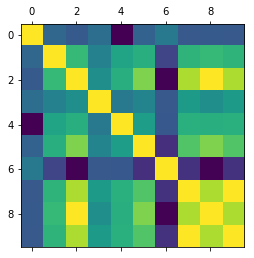

In [24]:
def visualize_corr():

    data = read_file()
    cd = data.corr()
    print cd

    plt.matshow(data.corr())
    plt.show()

visualize_corr()